# Apprentissage supervisé - Classification

http://cedric.cnam.fr/vertigo/Cours/ml/tpIntroductionScikitLearn.html

https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4022441-entrainez-votre-premier-k-nn

https://mrmint.fr/mnist-knn-handwritten-tutorial

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import metrics

## 1 Préparation des données

1.1 Téléchargement de données

In [2]:
mnist = fetch_openml("mnist_784", version=1)
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


#### 1. Le retour de la fonction "fetch_openml" est un dictionnaire (mnist). Affichez ces clés.


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#### 2. En utilisant les clés du dictionnaire "mnist", affichez :
• La taille des données (le nombre des features et la taille de chaque feature). Par convention,les données sont à stocker dans une variable "X".
• La taille des labels=classes (le nombre des labels). Par convention, les classes sont souvent à stocker dans une variable "y"
Les différentes classes de la base de données
• Une description détaillée de la base de données.

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

il y a 70 000 images comportant chacune 784 valeurs

In [7]:
#affichage des classes
set(y)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [8]:
#description détaillée de la base de donnée
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

<function matplotlib.pyplot.show(close=None, block=None)>

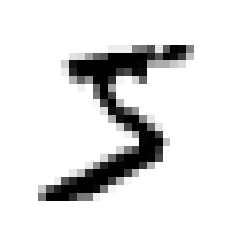

In [9]:
#3. Affichez l’image de la première instance de la base de données.

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show

In [10]:
y[0]

'5'

In [11]:
# 4. Affichez le type des labels (du premier label par exemple)

In [12]:
type(y[0])

str

In [13]:
#appliquez le casting sur les labels pour les transformer à des entiers.

y = y.astype(np.uint8)
y[0]

5

In [14]:
#1.3 Répartition des données

from sklearn.model_selection import train_test_split

shuffle_index = np.random.permutation(60000)

xtrain, xtest, ytrain, ytest = X[:60000], X[60000:], y[:60000], y[60000:]
xtrain, ytrain = xtrain[shuffle_index], ytrain[shuffle_index]
xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
#2.1 Apprentissage des données
ytrain_5 = (ytrain == 5)
ytest_5 = (ytrain == 5)
print(ytrain_5)
print(ytest_5)

[False False False ...  True False False]
[False False False ...  True False False]


In [16]:
#2.1.2
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

model = SGDClassifier()


print(xtrain.shape)
print(ytrain_5.shape)
model.fit(xtrain, ytrain_5)

(59500, 784)
(59500,)


SGDClassifier()

In [17]:
#faire une validation croisée ?
ypred = model.predict(xtrain[[0]])

In [18]:
#2.2.1 Taux de classification

In [19]:
score_model = model.score(xtrain, ytrain)
score_model

0.09823529411764706

In [20]:
scores = cross_val_score(model, xtrain, ytrain_5, scoring="accuracy", cv=3)
scores

array([0.96319451, 0.95547824, 0.96203298])

In [21]:
scores.mean()

0.9602352443820154

In [22]:
class Never5Classifier(BaseEstimator):
    def fit(self,X, y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

object5 = Never5Classifier()
object5.fit(xtrain, ytrain_5)

In [23]:
scores = cross_val_score(object5, xtrain, ytrain_5, scoring="accuracy", cv=3)
scores.mean()

0.9096302212615197

In [24]:
ypred = cross_val_predict(model, xtrain, ytrain_5, cv=3)

In [25]:
confusion_matrix(ytrain_5, ypred)

array([[53323,   800],
       [ 1794,  3583]], dtype=int64)

1. Calculez la précision, le rappel et le score F1 du modèle d’apprentissage

In [26]:
precision_score(ytrain_5, ypred)

0.8174766141911932

In [27]:
recall_score(ytrain_5, ypred)

0.6663567044820532

In [28]:
f1_score(ytrain_5, ypred)

0.7342213114754098

Affichez les scores des différentes instances de la base d’apprentissage via la fonction "cross_val_predict".

In [29]:
y_score = cross_val_predict(model, xtrain, ypred, method='decision_function', cv=3)
y_score

array([-25335.99181699, -10619.86933205, -23966.17852222, ...,
         3895.57812733, -49250.0765732 , -90639.9854675 ])

In [30]:
#3 Calculez les précisions et les rappels de chaque instance en utilisant la fonction "precision_recall_curve"

precision_recall_curve(ytrain_5, y_score)

(array([0.0906348 , 0.09061947, 0.090621  , ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99814023e-01, 9.99814023e-01, ...,
        3.71954622e-04, 1.85977311e-04, 0.00000000e+00]),
 array([-119367.34321527, -119211.00702574, -119105.2204535 , ...,
          54405.4757216 ,   55668.58659891,   75014.00636221]))

## 4 Tracez la courbe des précisions/rappels.

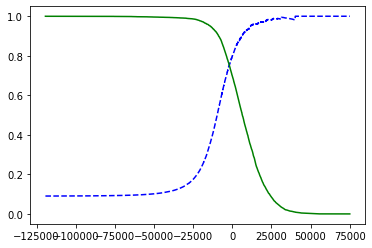

In [31]:
precision, recall, threshold = precision_recall_curve(ytrain_5, y_score)

def plot_precision_recall_vs_threshold (precision, recall, threshold):

    plt.plot(threshold, precision[:-1], "b--", label="Precision")
    plt.plot(threshold, recall[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precision, recall, threshold)

plt.show()

### 2.2.4 Courbe ROC:

In [32]:
tfp, tvp, thresholds = roc_curve(ytrain_5, y_score)
print(tfp)
print(tvp)
print(thresholds)

[0.        0.        0.        ... 0.9967851 0.9967851 1.       ]
[0.00000000e+00 1.85977311e-04 9.85679747e-03 ... 9.99814023e-01
 1.00000000e+00 1.00000000e+00]
[  75015.00636221   75014.00636221   40174.94262162 ... -119211.00702574
 -119367.34321527 -201828.26963843]


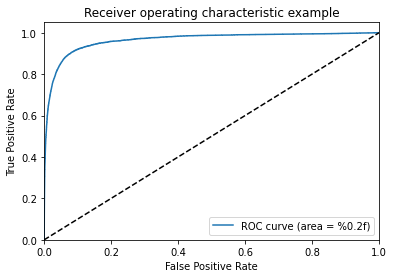

In [33]:
plt.figure()
plt.plot(tfp, tvp, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
#Calculez l’AUC (Area Under the Curve) du modèle d’apprentissage.
roc_auc = metrics.auc(tfp, tvp)
roc_auc

0.9638985440594605

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain_5, y_score)

0.9638985440594605

# 3 Apprentissage d’un classifieur multi-classes

## 3.1 Apprentissage des données

In [36]:
model = SGDClassifier()
model.fit(xtrain, ytrain)

SGDClassifier()

In [59]:
# 3.1.1
model.predict([some_digit])

array([3], dtype=uint8)

In [62]:
# Affichez les 10 scores de décision utilisés par la méthode SGD pour classifier la première instance de la base de données.

from sklearn.svm import SVC
model.decision_function([some_digit])

array([[-13016.99233761, -27351.42196995,  -8338.09446543,
          6815.18964623, -27434.16827278,    352.30057369,
        -26822.99200407, -11723.88773566,  -9721.35450395,
        -13865.11921143]])

In [54]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [65]:
# 3.2.1 Taux de classification
scores = cross_val_score(model, xtrain, ytrain, scoring="accuracy", cv=3)
scores

array([0.88378542, 0.87919125, 0.87687188])

In [70]:
scores.mean()

0.8799495153629645

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain.astype(np.float64))

In [72]:
cross_val_score(model, xtrain_scaled, ytrain, cv=3, scoring="accuracy")

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.90309569, 0.8956285 , 0.89386376])

In [73]:
ytrain_pred = cross_val_predict(model, xtrain_scaled, ytrain, cv=3)

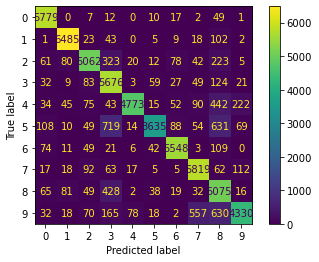

In [102]:
# 3.2.2 Matrice de Confusion
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, xtrain, ytrain)

In [ ]:
# 4 Construction d'un réseau de neurone
# il prend en entrée xtrain
# il faut l'entrainer
# prédire ytrain